In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics.pairwise import cosine_similarity

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
books = pd.read_csv("datasets/Books.csv")
users = pd.read_csv("datasets/Users.csv")
ratings = pd.read_csv("datasets/Ratings.csv")

/var/folders/8t/fxn4dz8j0_55xdlmpw2xns6w0000gn/T/ipykernel_11411/2906776592.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


In [ ]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
books.shape

(271360, 8)

In [ ]:
valid_years = books['Year-Of-Publication'].astype(str).str.isnumeric()

# Filter out rows with non-numeic values
books = books[valid_years] 
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

# Convert Year-Of-Publication to year format store it in Publication-Date
books['Publication_Date'] = pd.to_datetime(books['Year-Of-Publication'], format='%Y', errors='coerce')
books.drop(columns=['Year-Of-Publication'], inplace=True) 
books = pd.DataFrame(books)

/var/folders/8t/fxn4dz8j0_55xdlmpw2xns6w0000gn/T/ipykernel_11411/593117773.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)
/var/folders/8t/fxn4dz8j0_55xdlmpw2xns6w0000gn/T/ipykernel_11411/593117773.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Publication_Date'] = pd.to_datetime(books['Year-Of-Publication'], format='%Y', errors='coerce')
/var/folders/8t/fxn4dz8j0_55xdlmpw2xns6w0000gn/T/ipykernel_11411/593117773.py:9: Se

In [ ]:
books

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publication_Date
0,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2002-01-01
1,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,2001-01-01
2,0060973129,Decision in Normandy,Carlo D'Este,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,1991-01-01
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,1999-01-01
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1999-01-01
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,1988-01-01
271356,0525447644,From One to One Hundred,Teri Sloat,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,1991-01-01
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,2004-01-01
271358,0192126040,Republic (World's Classics),Plato,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,1996-01-01


In [ ]:
books['Year-Of-Publication'] = books['Publication_Date'].dt.year
books['Year-Of-Publication'].value_counts().index.values

array([2002., 1999., 2001., 2000., 1998., 1997., 2003., 1996., 1995.,
       1994., 1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986.,
       2004., 1985., 1984., 1983., 1982., 1981., 1980., 1979., 1978.,
       1977., 1976., 1975., 1974., 1973., 1972., 1971., 1970., 1969.,
       1968., 1966., 1967., 1965., 1964., 1960., 1961., 1963., 1962.,
       1959., 1958., 1957., 1956., 1955., 1953., 1954., 2005., 1951.,
       1940., 1952., 1920., 1950., 1911., 1942., 1947., 1946., 1930.,
       1949., 1923., 1941., 1939., 1948., 1945., 1943., 1901., 1938.,
       2030., 1936., 1929., 1937., 1932., 1944., 1933., 1935., 2006.,
       1900., 1931., 2020., 1927., 1921., 1922., 1909., 2011., 1925.,
       1926., 2010., 1924., 1902., 2050., 1928., 1904., 2012., 2024.,
       1897., 1919., 2008., 1934., 1910., 1806., 2021., 2038., 1906.,
       1908., 1914., 1917., 2026., 2037.])

In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publication_Date,Year-Of-Publication
0,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2002-01-01,2002.0
1,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,2001-01-01,2001.0
2,0060973129,Decision in Normandy,Carlo D'Este,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,1991-01-01,1991.0
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,1999-01-01,1999.0
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1999-01-01,1999.0


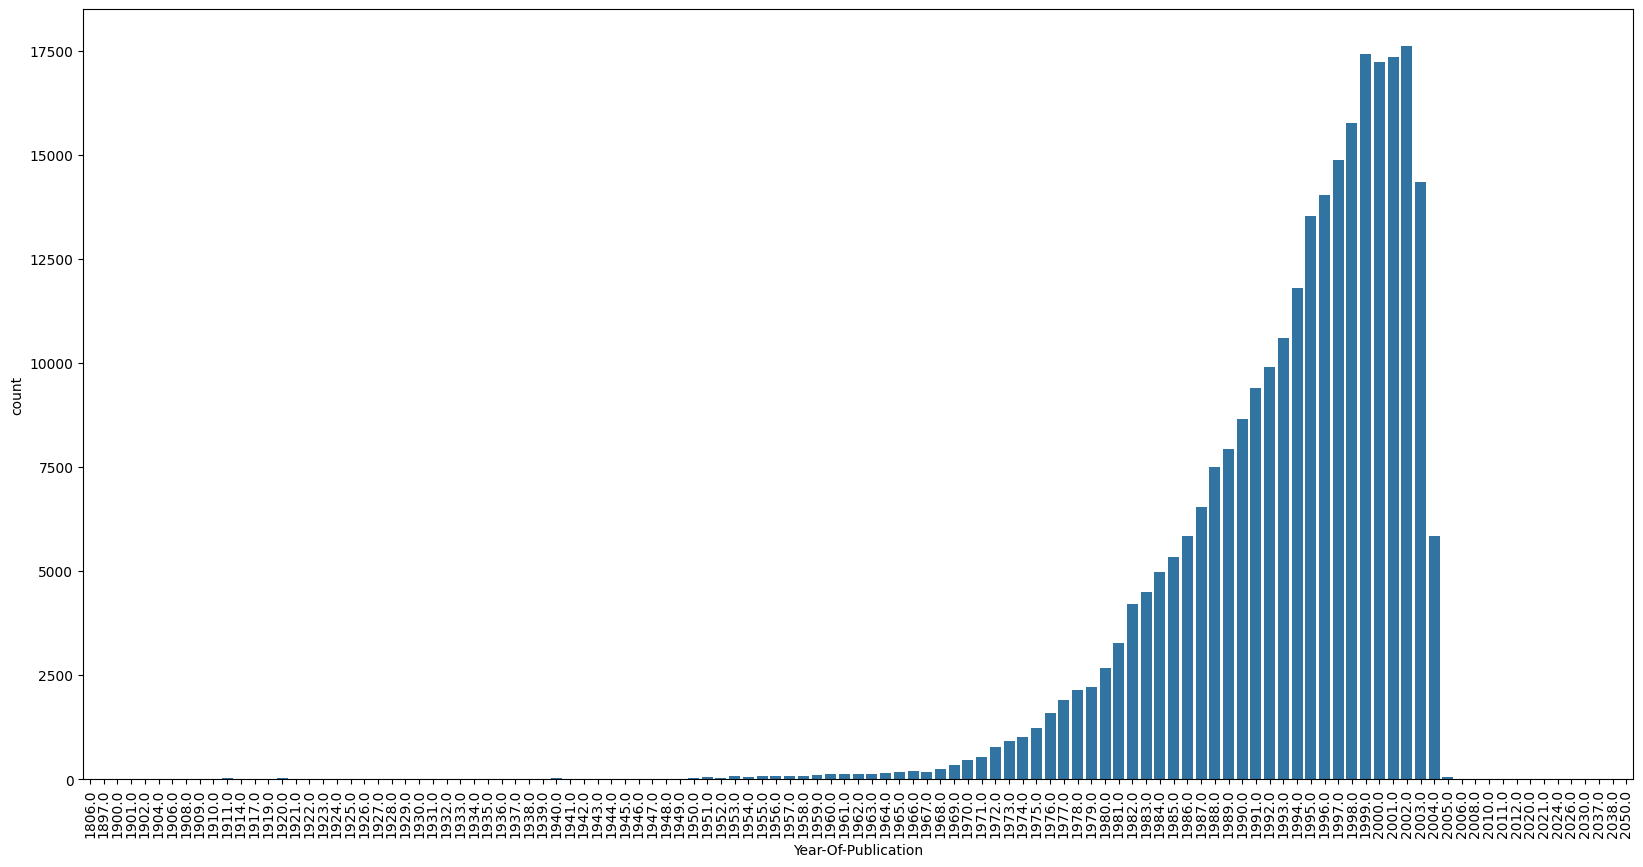

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x=books['Year-Of-Publication'])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
users['Location'] = users['Location'].apply(lambda x : x.split(",")[-1])

In [ ]:
users.head()

,User-ID,Location,Age
0,1,usa,NaN
1,2,usa,18.0
2,3,russia,NaN
3,4,portugal,17.0
4,5,united kingdom,NaN


<Axes: xlabel='Location'>

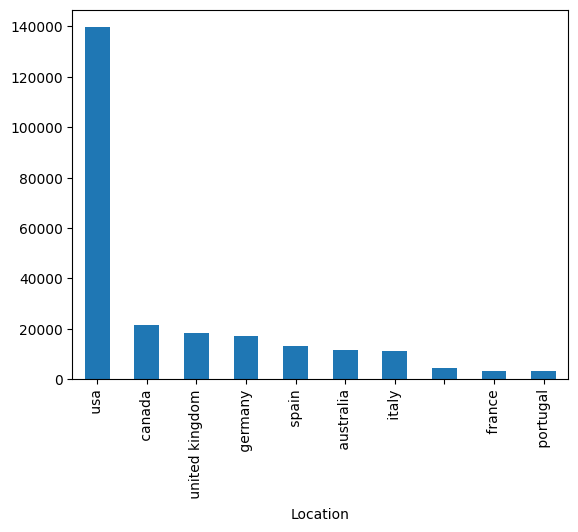

In [ ]:
users['Location'].value_counts().head(10).plot(kind = 'bar')

In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings.shape

(1149780, 3)

<Axes: xlabel='Book-Rating'>

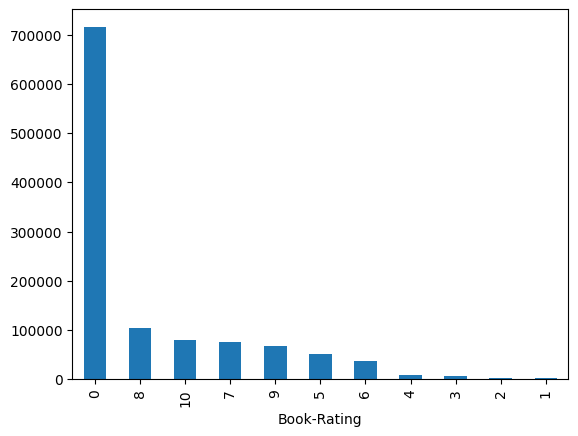

In [ ]:
ratings['Book-Rating'].value_counts().plot(kind = 'bar')

In [ ]:
books['Image-URL-M'][1]

'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg'

In [ ]:
books.isnull().sum()

ISBN                      0
Book-Title                0
Book-Author               2
Publisher                 2
Image-URL-S               0
Image-URL-M               0
Image-URL-L               0
Publication_Date       4620
Year-Of-Publication    4620
dtype: int64

In [ ]:
books['Book-Author'] = books['Book-Author'].fillna('Unknown Author')
books['Publisher'] = books['Publisher'].fillna('Unknown Publisher')
books['Publication_Date'] = books['Publication_Date'].fillna('Unknown')
books['Year-Of-Publication'] = books['Year-Of-Publication'].fillna(0)
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Publication_Date       0
Year-Of-Publication    0
dtype: int64

In [ ]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [ ]:
median_age = users['Age'].median()
users['Age'] = users['Age'].fillna(median_age)
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [ ]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
books.duplicated().sum()

np.int64(0)

In [ ]:
users.duplicated().sum()

np.int64(0)

In [ ]:
ratings.duplicated().sum()

np.int64(0)

In [ ]:
ratings_with_name = ratings.merge(books,on='ISBN')
ratings_with_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publication_Date,Year-Of-Publication
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,2002-01-01 00:00:00,2002.0
1,276726,0155061224,5,Rites of Passage,Judith Rae,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,2001-01-01 00:00:00,2001.0
2,276727,0446520802,0,The Notebook,Nicholas Sparks,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,1996-01-01 00:00:00,1996.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,1999-01-01 00:00:00,1999.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,2001-01-01 00:00:00,2001.0


In [ ]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.head()

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [ ]:
num_rating_df.rename(columns = {'Book-Rating' : 'Number-Of-Ratings'}, inplace = True)
num_rating_df.head()

,Book-Title,Number-Of-Ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [ ]:
valid_ratings = ratings_with_name[pd.to_numeric(ratings_with_name['Book-Rating'], errors='coerce').notna()]
avg_rating_df = valid_ratings.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'Average-Rating'}, inplace=True)
avg_rating_df.head()

,Book-Title,Average-Rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [ ]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df.head()

,Book-Title,Number-Of-Ratings,Average-Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [ ]:
popular_df = popular_df[popular_df['Number-Of-Ratings']>=250].sort_values('Average-Rating',ascending=False).head(50)

In [ ]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','Number-Of-Ratings','Average-Rating']]

In [ ]:
popular_df.head()

,Book-Title,Book-Author,Image-URL-M,Number-Of-Ratings,Average-Rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453


In [ ]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
reader_users = x[x].index

In [ ]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(reader_users)]

In [ ]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [ ]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Publication_Date,Year-Of-Publication
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,1994-01-01 00:00:00,1994.0
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,1999-01-01 00:00:00,1999.0
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,2002-01-01 00:00:00,2002.0
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,1995-01-01 00:00:00,1995.0
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,1998-01-01 00:00:00,1998.0


In [ ]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pt.fillna(0,inplace=True)
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
similarity_scores = cosine_similarity(pt)
similarity_scores.shape

(706, 706)

In [ ]:
def recommend(book_name):
    if book_name in pt.index :
        index = np.where(pt.index == book_name)[0][0]
        similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:11]

        print(f'Recommendations for the book {book_name}:')
        print('-'*5)

        for book in similar_items:
            print(pt.index[book[0]])
        print('\n')

    else:
        print('Book Not Found')
        print('\n')

In [ ]:
recommend('A Walk to Remember')

Recommendations for the book A Walk to Remember:
-----
The Rescue
Nights in Rodanthe
The Notebook
Granny Dan
A Bend in the Road
The Dogs of Babel (Today Show Book Club #12)
The Reptile Room (A Series of Unfortunate Events, Book 2)
Message in a Bottle
Accident
The Guardian




In [ ]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

Recommendations for the book Harry Potter and the Chamber of Secrets (Book 2):
-----
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
Charlotte's Web (Trophy Newbery)
The Fellowship of the Ring (The Lord of the Rings, Part 1)
The Witness
The Firm
The Secret Garden


